# Replicate Vanderburg & Johnson 2014 with `lightkurve`

[Vanderburg and Johnson 2014](http://adsabs.harvard.edu/abs/2014PASP..126..948V) introduced a method for "Self Flat Fielding" by tracking how the lightcurve changes with motion of the spacecraft.


In this notebook we replicate the K2SFF method following the same example K2 source, #60021426, as that in the publication.  We start from the Target Pixel File and proceed to a "de-trended" lightcurve plot.  We hope to show the ease-of-use of the new `lightkurve` toolkit, and that it achieves identical performace with published papers.

The paper uses data from the two-wheel concept engineering test, predating campaign 0, and sometimes called campaign *"eng"*.

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Things to do:

- Add more explanatory material.
- Use same TPF aperture mask as VDB & J.
- Update to most recent development version
- Lop off the same time stamps as VDB & J
- Use the same thruster fire masks as VDB & J.
- Use the `lc.correct()` method instead of the `SFF` directly.
- Suppress warning while plotting.
- Make screencast


In [4]:
from lightkurve import KeplerTargetPixelFile
from lightkurve.lightcurve import SFFCorrector

In [5]:
sff = SFFCorrector()

In [6]:
pathname = 'https://archive.stsci.edu/pub/k2/eng/long_cadence/kplr060021426-2014044044430_lpd-targ.fits'
tpf = KeplerTargetPixelFile(pathname)

/Users/obsidian/anaconda3/lib/python3.6/site-packages/astropy/visualization/stretch.py:264: RuntimeWarning: invalid value encountered in log
  np.log(values, out=values)
/Users/obsidian/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


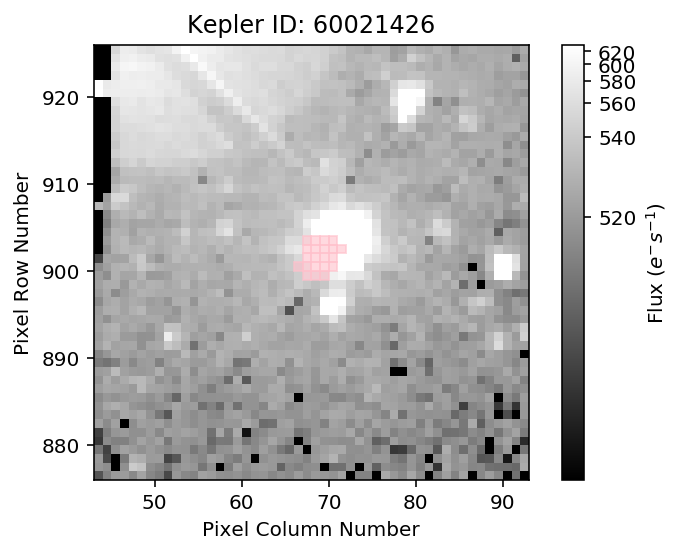

In [7]:
tpf.plot(aperture_mask=tpf.pipeline_mask, scale='log', cmap='gray');

In [9]:
lc_raw = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [10]:
lc, mask = lc_raw.remove_outliers(return_mask=True)

In [11]:
lc.flux.shape

(435,)

The data from the first few days is way lower than the typical data, so let's just lop it off.

In [12]:
lc = lc_raw.remove_outliers(sigma=2.0).normalize()

In [13]:
lc.flux.shape

(294,)

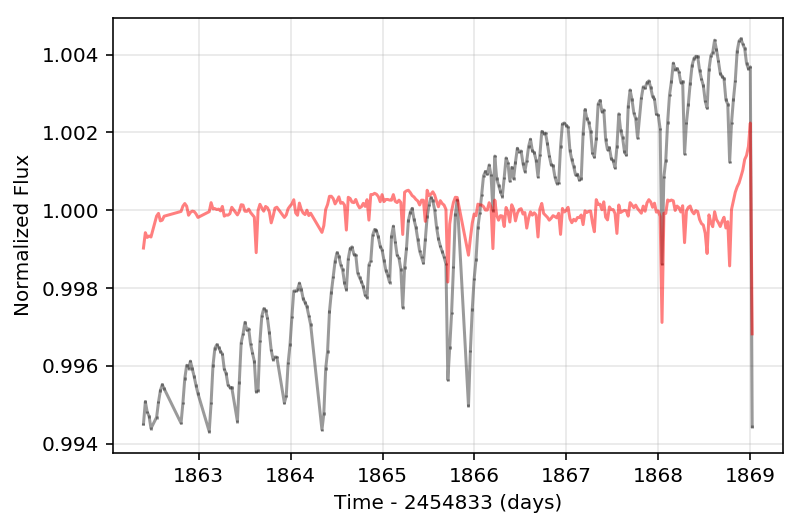

In [23]:
ax = lc.plot(linestyle='-', alpha=0.5)
lc_corrected.plot(linestyle='-', color='r',alpha=0.5, ax=ax)

In [ ]:
lc.correct()

In [15]:
lc_corrected = sff.correct(lc.time, lc.flux, lc.centroid_col, lc.centroid_col, 
                           niters=1, windows=1, polyorder=5)

100%|██████████| 1/1 [00:00<00:00, 20.68it/s]


Let's do a head-to-head comparison of the raw data, and what appears in the diagnostic data.

The raw data contains more pixels (435 > 307), since Vanderburg eliminated some low-quality data at the beginning.

(1862, 1870)

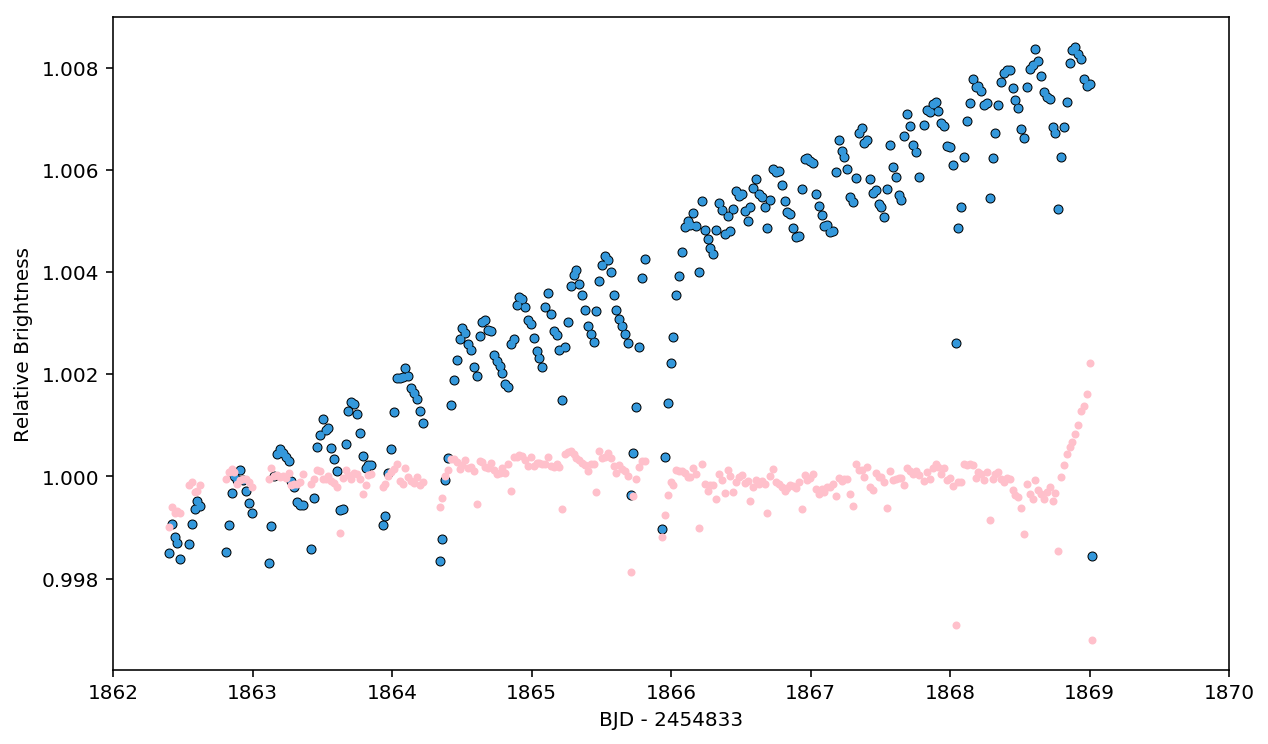

In [20]:
plt.figure(figsize=(10,6))

dy = 0.004
plt.plot(lc.time, lc.flux + dy, 'ko', ms=4)
plt.plot(lc.time, lc.flux+dy, 'o', color='#3498db', ms=3)
plt.plot(lc_corrected.time, lc_corrected.flux, 'o', color='pink', ms = 3)

plt.xlabel('BJD - 2454833')
plt.ylabel('Relative Brightness')

plt.xlim(1862, 1870)
#plt.ylim(0.994, 1.008);

Neat! It looks similar!  Still some work to do!

- Consider return the intermediate trends (e.g. the bpline) back into `lc`, when applying sff.
- Fix issue #32 missing mission metadata for ENG data
- Resolve easy user-defined masking in issue 35.

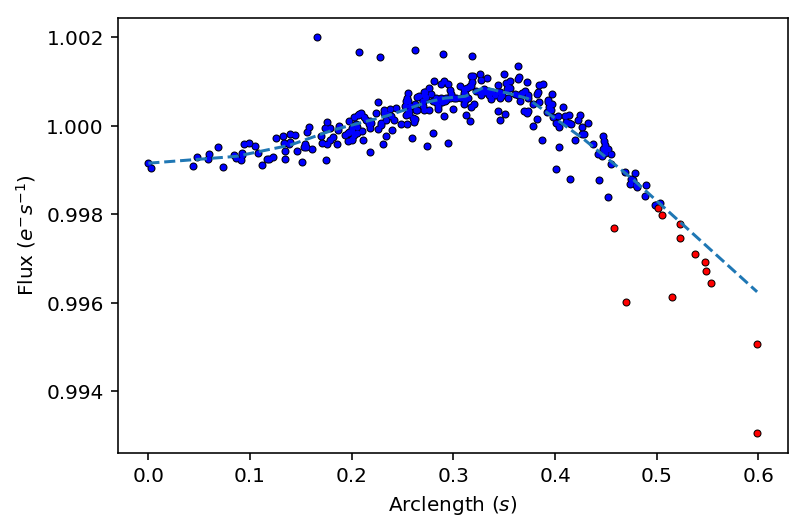

In [59]:
sff._plot_normflux_arclength()

In [25]:
sff.bspline()

TypeError: float() argument must be a string or a number, not 'method'

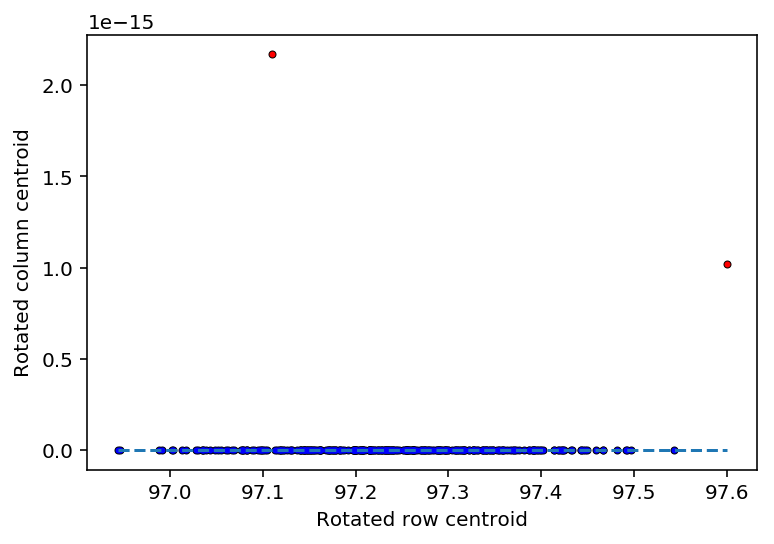

In [60]:
sff._plot_rotated_centroids()

The end!